In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

import os
print(os.getcwd())

/Users/omerorhan


In [2]:
def readExcelSheet1(excelfile):
    from pandas import read_excel
    return (read_excel(excelfile)).values



In [3]:
def readExcelRange(excelfile,sheetname="Sheet1",startrow=1,endrow=1,startcol=1,endcol=1):
    from pandas import read_excel
    values=(read_excel(excelfile, sheetname,header=None)).values;
    return values[startrow-1:endrow,startcol-1:endcol]

In [4]:
def readExcel(excelfile,**args):
    if args:
        data=readExcelRange(excelfile,**args)
    else:
        data=readExcelSheet1(excelfile)
    if data.shape==(1,1):
        return data[0,0]
    elif (data.shape)[0]==1:
        return data[0]
    else:
        return data

In [5]:
def writeExcelData(x,excelfile,sheetname,startrow,startcol, reshape=None):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    if reshape:
        df=DataFrame(x.reshape(-1,len(x)))
    else:
        df=DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname,startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()
    writer.close()

In [6]:
def getSheetNames(excelfile):
    from pandas import ExcelFile
    return (ExcelFile(excelfile)).sheet_names

In [14]:
def Build1DHistogramClassifier(X,T,B,xmin,xmax):
    HF=np.zeros(B).astype('int32');
    HM=np.zeros(B).astype('int32');
    binindices=(np.round(((B-1)*(X-xmin)/(xmax-xmin)))).astype('int32');
    for i,b in enumerate(binindices):
        if T[i]=='Female':
            HF[b]+=1;
        else:
            HM[b]+=1;
    return [HF, HM]

In [8]:
def Apply1DHistogramClassifier(queries,HF,HM,xmin,xmax):
    B=np.alen(HF);
    binindices=np.clip((np.round(((B-1)*(queries-xmin)/(xmax-xmin)))).astype('int32'),0,B-1);
    countF=HF[binindices];
    countM=HM[binindices];
    resultlabel=np.full(np.alen(binindices),"Indeterminate",dtype=object);
    resultprob=np.full(np.alen(binindices),np.nan,dtype=object);
    indicesF=countF>countM;
    indicesM=countM>countF;
    resultlabel[indicesF]="Female";
    resultlabel[indicesM]="Male";
    probF=countF/(countF+countM);
    probM=countM/(countF+countM);
    resultprob[indicesF]=probF[indicesF];
    resultprob[indicesM]=probM[indicesM];
    return resultlabel, resultprob

In [9]:
excelfile=r"/Users/omerorhan/Desktop/UCSC/MachineLearning/Assignment_1_Data_and_Template.xlsx";
sheets=getSheetNames(excelfile);sheets

['Data',
 'Classifiers - Full Data',
 'Classifiers - Partial Data',
 'Queries',
 'Observations',
 'ID']

In [10]:
data=readExcel(excelfile)
X=np.array(data[:,0]*12+data[:,1],dtype=float)
T=np.array([str(g) for g in data[:,2]])
print(X)
print(T)

[70. 76. 70. ... 69. 60. 64.]
['Male' 'Male' 'Male' ... 'Male' 'Female' 'Female']


In [11]:
queries=(readExcel(excelfile,
                  sheetname='Classifiers - Full Data',
                  startrow=17,
                  endrow=17,
                  startcol=2,
                  endcol=7)).astype(float);queries

array([], shape=(0, 6), dtype=float64)

In [15]:
#Histogram Classifier

B=32;
xmin=np.amin(X);
xmax=np.amax(X);
[HF,HM]=Build1DHistogramClassifier(X,T,B,xmin,xmax);


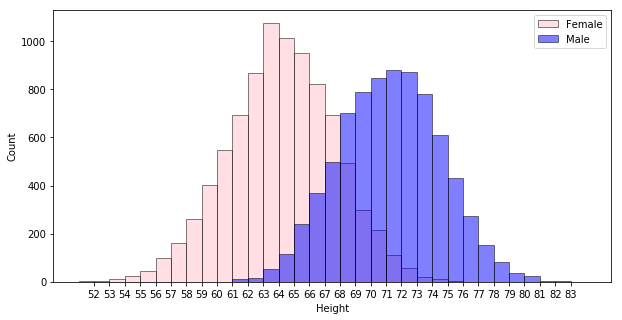

In [16]:
plt.figure(figsize=(10,5));
opacity = 0.5
[bincenters,binwidth]=np.linspace(xmin, xmax, num=B, retstep=True);
rects1 = plt.bar(bincenters-(binwidth/2), HF, binwidth,
                 alpha=opacity,
                 color='pink',
                 edgecolor='black',
                 label='Female')
rects2 = plt.bar(bincenters+(binwidth/2), HM, binwidth,
                 alpha=opacity,
                 color='b',
                 edgecolor='black',
                 label='Male')
plt.xlabel('Height')
plt.ylabel('Count')
plt.xticks(bincenters, bincenters.astype('int32'), fontsize=10)
plt.legend()
plt.show()

In [17]:
[resultHlabel, resultHprob]=Apply1DHistogramClassifier(queries,HF,HM,xmin,xmax)


IndexError: too many indices for array

In [18]:
[resultHlabel, resultHprob]=Apply1DHistogramClassifier(queries,HF,HM,xmin,xmax)


IndexError: too many indices for array

In [19]:
#full data
excelfile=r"/Users/omerorhan/Desktop/UCSC/MachineLearning/Assignment_1_Data_and_Template.xlsx";
sheets=getSheetNames(excelfile);sheets

data=readExcel(excelfile)
X=np.array(data[:,0]*12+data[:,1],dtype=float)
T=np.array([str(g) for g in data[:,2]])
print(X)
print(T)

B=32;
xmin=np.amin(X);
xmax=np.amax(X);
writeExcelData(np.array([xmin]),excelfile,'Classifiers - Full Data',1,2)
writeExcelData(np.array([xmax]),excelfile,'Classifiers - Full Data',2,2)

#print("xmax= %.2f",xmax)
#print("xmin= %.2f",xmin)

[HF,HM]=Build1DHistogramClassifier(X,T,B,xmin,xmax);
#print(Build1DHistogramClassifier(X,T,B,xmin,xmax))
#def writeExcelData(x,excelfile,sheetname,startrow,startcol):
#print(HF)
writeExcelData(HF,excelfile,'Classifiers - Full Data',5,3, True)
writeExcelData(HM,excelfile,'Classifiers - Full Data',6,3, True)

[resultHlabel, resultHprob]=Apply1DHistogramClassifier([55,60,65,70,75,80],HF,HM,xmin,xmax)
writeExcelData(resultHlabel,excelfile,'Queries',3,2)
writeExcelData(resultHprob,excelfile,'Queries',3,3)


#print([resultHlabel, resultHprob])

print("finished")


[70. 76. 70. ... 69. 60. 64.]
['Male' 'Male' 'Male' ... 'Male' 'Female' 'Female']


finished


In [21]:
#FULL DATA
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

print(mean([1,2,3]))

X=np.array(data[:,0]*12+data[:,1],dtype=float)
data[:,1]= X
#print(data)
T=np.array([str(g) for g in data[:,2]])

#np.select(data[:,2]=='Female', data[,1])
femaledata = (data[data[:,2]=='Female'])
maledata = (data[data[:,2]=='Male'])
print(X)
#print(maledata[:,[1]].std()) 
meanFemale= femaledata[:,[1]].mean()
meanMale = maledata[:,[1]].mean()
writeExcelData([femaledata[:,[1]].mean()],excelfile,'Classifiers - Full Data',8,3)
writeExcelData([maledata[:,[1]].mean()],excelfile,'Classifiers - Full Data',9,3)

stdfemale= femaledata[:,[1]].std()
stdmale=maledata[:,[1]].std()
writeExcelData([femaledata[:,[1]].std()],excelfile,'Classifiers - Full Data',11,3)
writeExcelData([maledata[:,[1]].std()],excelfile,'Classifiers - Full Data',12,3)

writeExcelData([len(femaledata[:,[1]])],excelfile,'Classifiers - Full Data',14,3)
writeExcelData([len(maledata[:,[1]])],excelfile,'Classifiers - Full Data',15,3)

print('finished')
print(len(femaledata[:,[1]]))

2.0
[130. 148. 130. ... 129. 120. 124.]


finished
8900


In [ ]:
def Apply1DHistogramClassifier(queries,HF,HM,xmin,xmax):
    B=np.alen(HF);
    binindices=np.clip((np.round(((B-1)*(queries-xmin)/(xmax-xmin)))).astype('int32'),0,B-1);
    countF=HF[binindices];
    countM=HM[binindices];
    resultlabel=np.full(np.alen(binindices),"Indeterminate",dtype=object);
    resultprob=np.full(np.alen(binindices),np.nan,dtype=object);
    indicesF=countF>countM;
    indicesM=countM>countF;
    resultlabel[indicesF]="Female";
    resultlabel[indicesM]="Male";
    probF=countF/(countF+countM);
    print(probF)
    probM=countM/(countF+countM);
    resultprob[indicesF]=probF[indicesF];
    resultprob[indicesM]=probM[indicesM];
    return resultlabel, resultprob



In [ ]:
import math
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
resultlabel1=[]
problabel=[]
liste = [65]

print(calculateProbability(65,meanMale,stdmale))

In [22]:
import math
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

#meanFemale,meanMale,stdfemale,stdmale
resultlabel1=[]
problabel=[]
liste = [55,60,65,70,75,80]
print(len(maledata))
print(len(femaledata))

for item in liste: 
    maleProb= len(maledata)*calculateProbability(item,meanMale,stdmale)
    femaleprob= len(femaledata)*calculateProbability(item,meanFemale,stdfemale)
    maleProb= maleProb/(maleProb+femaleprob)
    femaleprob= femaleprob/(maleProb+femaleprob)

    if maleProb >femaleprob:
        resultlabel1.append('Male')
        problabel.append(maleProb)
    else:
        resultlabel1.append('Female')
        problabel.append(femaleprob)

writeExcelData(resultlabel1,excelfile,'Queries',3,4)
writeExcelData(problabel,excelfile,'Queries',3,5)
print('finished')

7800
8900


finished


In [ ]:
import math
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

#meanFemale,meanMale,stdfemale,stdmale
resultlabel1=[]
problabel=[]
liste = [55]
for item in liste: 
    maleProb= len(maledata[:,[1]])*calculateProbability(item,meanMale,stdmale)   
    femaleprob= len(femaledata[:,[1]]) * calculateProbability(item,meanFemale,stdfemale)

    print(maleProb)
    print(femaleprob)
print('finished')

In [ ]:
def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.iteritems():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	return probabilities

In [23]:
#partial data
excelfile=r"/Users/omerorhan/Desktop/UCSC/MachineLearning/Assignment_1_Data_and_Template.xlsx";
sheets=getSheetNames(excelfile);sheets

data=readExcel(excelfile)
data = data[0:50]
X=np.array(data[:,0]*12+data[:,1],dtype=float)
T=np.array([str(g) for g in data[:,2]])
B=32;

writeExcelData(np.array([xmin]),excelfile,'Classifiers - Partial Data',1,2)
writeExcelData(np.array([xmax]),excelfile,'Classifiers - Partial Data',2,2)



[HF,HM]=Build1DHistogramClassifier(X,T,B,xmin,xmax);
#print(Build1DHistogramClassifier(X,T,B,xmin,xmax))
#def writeExcelData(x,excelfile,sheetname,startrow,startcol):
writeExcelData(HF,excelfile,'Classifiers - Partial Data',5,3, True)
writeExcelData(HM,excelfile,'Classifiers - Partial Data',6,3, True)


[resultHlabel, resultHprob]=Apply1DHistogramClassifier([55,60,65,70,75,80],HF,HM,xmin,xmax)
writeExcelData(resultHlabel,excelfile,'Queries',12,2)
writeExcelData(resultHprob,excelfile,'Queries',12,3)
print([resultHlabel, resultHprob])

print('finished')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


[array(['Female', 'Indeterminate', 'Female', 'Male', 'Male', 'Male'],
      dtype=object), array([1.0, nan, 1.0, 1.0, 1.0, 1.0], dtype=object)]
finished


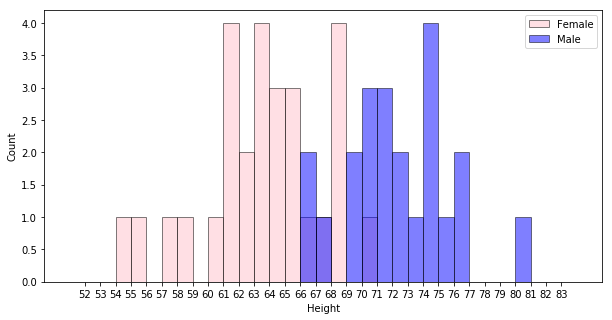

In [24]:

plt.figure(figsize=(10,5));
opacity = 0.5
[bincenters,binwidth]=np.linspace(xmin, xmax, num=B, retstep=True);
rects1 = plt.bar(bincenters-(binwidth/2), HF, binwidth,
                 alpha=opacity,
                 color='pink',
                 edgecolor='black',
                 label='Female')
rects2 = plt.bar(bincenters+(binwidth/2), HM, binwidth,
                 alpha=opacity,
                 color='b',
                 edgecolor='black',
                 label='Male')
plt.xlabel('Height')
plt.ylabel('Count')
plt.xticks(bincenters, bincenters.astype('int32'), fontsize=10)
plt.legend()
plt.show()


In [25]:
def Apply1DHistogramClassifier(queries,HF,HM,xmin,xmax):
    B=np.alen(HF);
    print(B)
    binindices=np.clip((np.round(((B-1)*(queries-xmin)/(xmax-xmin)))).astype('int32'),0,B-1);
    print("sdasd"+str(binindices))
    countF=HF[binindices];
    countM=HM[binindices];

    resultlabel=np.full(np.alen(binindices),"Indeterminate",dtype=object);
    resultprob=np.full(np.alen(binindices),np.nan,dtype=object);
    print(resultlabel)

    indicesF=countF>countM;
    indicesM=countM>countF;
    resultlabel[indicesF]="Female";
    resultlabel[indicesM]="Male";
    probF=countF/(countF+countM);
    print(probF)
    probM=countM/(countF+countM);
    resultprob[indicesF]=probF[indicesF];
    resultprob[indicesM]=probM[indicesM];
    return resultlabel, resultprob
print(HM)
[resultHlabel, resultHprob]=Apply1DHistogramClassifier([55,60,65,70,75,80],HF,HM,xmin,xmax)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 2 3 3 2 1 4 1 2 0 0 0 1 0 0 0]
32
sdasd[ 3  8 13 18 23 28]
['Indeterminate' 'Indeterminate' 'Indeterminate' 'Indeterminate'
 'Indeterminate' 'Indeterminate']
[ 1. nan  1.  0.  0.  0.]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
binindices=np.clip(8,0,31);
print(binindices)

In [26]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

X=np.array(data[:,0]*12+data[:,1],dtype=float)
data[:,1]= X
#print(data)
T=np.array([str(g) for g in data[:,2]])

#np.select(data[:,2]=='Female', data[,1])
femaledata = (data[data[:,2]=='Female'])
maledata = (data[data[:,2]=='Male'])
print(X)
#print(maledata[:,[1]].std()) 
meanFemale= femaledata[:,[1]].mean()
meanMale = maledata[:,[1]].mean()
writeExcelData([femaledata[:,[1]].mean()],excelfile,'Classifiers - Partial Data',8,3)
writeExcelData([maledata[:,[1]].mean()],excelfile,'Classifiers - Partial Data',9,3)

stdfemale= femaledata[:,[1]].std()
stdmale=maledata[:,[1]].std()
writeExcelData([femaledata[:,[1]].std()],excelfile,'Classifiers - Partial Data',11,3)
writeExcelData([maledata[:,[1]].std()],excelfile,'Classifiers - Partial Data',12,3)

writeExcelData([len(femaledata[:,[1]])],excelfile,'Classifiers - Partial Data',14,3)
writeExcelData([len(maledata[:,[1]])],excelfile,'Classifiers - Partial Data',15,3)



print('finished')

[70. 76. 70. 69. 67. 72. 71. 69. 65. 62. 67. 71. 70. 75. 74. 58. 69. 64.
 74. 76. 69. 73. 66. 74. 62. 62. 65. 71. 64. 74. 64. 69. 72. 63. 63. 55.
 62. 65. 80. 64. 66. 61. 71. 66. 68. 66. 69. 66. 56. 59.]


finished


In [28]:
import math
def calculateProbability(x, mean, stdev):
    print(math.pow(x-mean,2))
    print((2*math.pow(stdev,2)))
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

#meanFemale,meanMale,stdfemale,stdmale
resultlabel1=[]
problabel=[]
liste = [55,60,65,70,75,80]

for item in liste:
    maleProb= len(maledata)*calculateProbability(item,meanMale,stdmale)
    femaleprob= len(femaledata)*calculateProbability(item,meanFemale,stdfemale)
    maleProb= maleProb/(maleProb+femaleprob)
    femaleprob= femaleprob/(maleProb+femaleprob)

    if len(maledata[:,[1]])*maleProb >len(femaledata[:,[1]])*femaleprob:
        resultlabel1.append('Male')
        problabel.append(maleProb)
    else:
        resultlabel1.append('Female')
        problabel.append(femaleprob)


#print(resultlabel1)
#print(problabel)

writeExcelData(resultlabel1,excelfile,'Queries',12,4)
writeExcelData(problabel,excelfile,'Queries',12,5)
print(problabel)

282.8512396694213
22.842975206611577
82.29081632653057
30.132653061224488
139.6694214876032
22.842975206611577
16.57653061224488
30.132653061224488
46.48760330578505
22.842975206611577
0.8622448979591875
30.132653061224488
3.305785123966923
22.842975206611577
35.14795918367349
30.132653061224488
10.123966942148794
22.842975206611577
119.4336734693878
30.132653061224488
66.94214876033067
22.842975206611577
253.7193877551021
30.132653061224488


[0.9996905132460884, 0.9979281858707983, 0.9627485939752045, 0.714847260280245, 0.9682537291336183, 0.9954445569814462]
